In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask **Dataset**

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

'archive (2).zip'   data   face-mask-dataset.zip   kaggle.json	 sample_data


mporting the **Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_871.jpg', 'with_mask_45.jpg', 'with_mask_3459.jpg', 'with_mask_713.jpg', 'with_mask_1587.jpg']
['with_mask_1023.jpg', 'with_mask_3471.jpg', 'with_mask_2170.jpg', 'with_mask_786.jpg', 'with_mask_1704.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1232.jpg', 'without_mask_3018.jpg', 'without_mask_3551.jpg', 'without_mask_2697.jpg', 'without_mask_890.jpg']
['without_mask_3511.jpg', 'without_mask_1026.jpg', 'without_mask_3469.jpg', 'without_mask_1106.jpg', 'without_mask_1581.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of **Images**

with mask --> 1

without mask --> **0**

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the **Images**

In [ ]:
# displaying with mask image
img = mpimg.imread('/my pic.jpeg')
imgplot = plt.imshow(img)
plt.show()

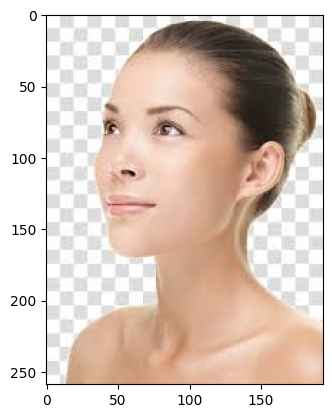

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image **Processing**

Resize the Images

Convert the images to numpy **arrays**

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[106, 104,  92],
        [110, 108,  96],
        [109, 107,  95],
        ...,
        [103,  96,  78],
        [105,  98,  79],
        [105,  97,  78]],

       [[106, 104,  92],
        [108, 106,  94],
        [108, 106,  94],
        ...,
        [101,  94,  75],
        [103,  96,  77],
        [104,  97,  78]],

       [[108, 106,  94],
        [106, 104,  92],
        [104, 102,  90],
        ...,
        [102,  95,  75],
        [102,  96,  76],
        [102,  95,  76]],

       ...,

       [[ 23,  20,  14],
        [ 27,  23,  16],
        [ 26,  19,  12],
        ...,
        [111,  43,  48],
        [113,  46,  50],
        [108,  42,  46]],

       [[ 24,  22,  15],
        [ 24,  21,  14],
        [ 23,  19,  12],
        ...,
        [110,  39,  45],
        [115,  44,  50],
        [111,  40,  46]],

       [[ 35,  32,  25],
        [ 27,  24,  17],
        [ 22,  18,  11],
        ...,
        [113,  40,  47],
        [115,  42,  49],
        [112,  38,  45]]], dtype=uint8)
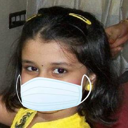

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test **Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 50,  49,  45],
        [ 47,  46,  42],
        [ 44,  43,  39],
        ...,
        [203, 196, 178],
        [202, 195, 177],
        [200, 193, 175]],

       [[ 48,  47,  43],
        [ 46,  45,  41],
        [ 45,  44,  40],
        ...,
        [203, 196, 178],
        [201, 194, 176],
        [199, 192, 174]],

       [[ 52,  51,  47],
        [ 52,  51,  47],
        [ 50,  49,  45],
        ...,
        [198, 191, 173],
        [197, 190, 172],
        [200, 193, 175]],

       ...,

       [[248, 250, 245],
        [250, 251, 247],
        [250, 250, 248],
        ...,
        [254, 252, 253],
        [252, 253, 255],
        [252, 253, 255]],

       [[248, 252, 247],
        [250, 253, 249],
        [249, 251, 248],
        ...,
        [254, 252, 253],
        [254, 252, 254],
        [252, 254, 254]],

       [[250, 255, 249],
        [250, 255, 250],
        [249, 252, 249],
        ...,
        [254, 252, 253],
        [254, 252, 253],
        [253, 253, 252]]], dtype=uint8)
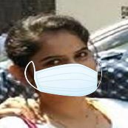

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.19607843, 0.19215686, 0.17647059],
        [0.18431373, 0.18039216, 0.16470588],
        [0.17254902, 0.16862745, 0.15294118],
        ...,
        [0.79607843, 0.76862745, 0.69803922],
        [0.79215686, 0.76470588, 0.69411765],
        [0.78431373, 0.75686275, 0.68627451]],

       [[0.18823529, 0.18431373, 0.16862745],
        [0.18039216, 0.17647059, 0.16078431],
        [0.17647059, 0.17254902, 0.15686275],
        ...,
        [0.79607843, 0.76862745, 0.69803922],
        [0.78823529, 0.76078431, 0.69019608],
        [0.78039216, 0.75294118, 0.68235294]],

       [[0.20392157, 0.2       , 0.18431373],
        [0.20392157, 0.2       , 0.18431373],
        [0.19607843, 0.19215686, 0.17647059],
        ...,
        [0.77647059, 0.74901961, 0.67843137],
        [0.77254902, 0.74509804, 0.6745098 ],
        [0.78431373, 0.75686275, 0.68627451]],

       ...,

       [[0.97254902, 0.98039216, 0.96078431],
        [0.98039216, 0.98431373, 0.96862745],
        [0.98039216, 0

Building a Convolutional Neural Networks (CNN)**bold text**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - acc: 0.7337 - loss: 0.6112 - val_acc: 0.8926 - val_loss: 0.2732
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8901 - loss: 0.3010 - val_acc: 0.9107 - val_loss: 0.2406
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9129 - loss: 0.2227 - val_acc: 0.9058 - val_loss: 0.2200
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9269 - loss: 0.1878 - val_acc: 0.9223 - val_loss: 0.1932
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9387 - loss: 0.1515 - val_acc: 0.9190 - val_loss: 0.2081


Model **Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9261 - loss: 0.2040
Test Accuracy = 0.9252150654792786


In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive **System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')